# Data Input and Output

The main application of Python or any other programming language in your future career will be the processing and analysis of data.

In [1]:
import numpy as np
import netCDF4 as nc

import matplotlib.pyplot as plt

![](../images/8_data_life_cycle.png)

You will use both self-collected (simulations, measurements) and already existing data.
To share and to make data available is therefore a key element of scientific practice.
Already when processing self-collected data, you should therefore keep in mind to describe them completely with their [metadata](https://en.wikipedia.org/wiki/Metadata).
Metadata is data about data, such as the units of the measured quantities, details about factors influencing the data or contact details.
Without the metadata, the data itself is not interpretable.

**Bad example:**

      0|    1|    2|    3|    4|    5|    6|    7|    8|    9|
    ----------------------------------------------------------
    1.2| 2.34|  4.6| 2.31|567.1|45.24| 4.63|1.855|  4.2|  1.5|


**Good example:**

    Incubator experiment No. 3456
    Date: 13.03.2018
    Contact: Martin Claus <mclaus@geomar.de>
    Bacteria: Escherichia coli
    Substrate: Agar plates
    Cultivation: 10 days following Aaronson et al. (2017)
    
    temperature [°C]   |   0|    1|    2|    3|    4|    5|    6|    7|    8|    9|
    -----------------------------------------------------------------------------
    growth rate [1/day]| 1.2| 2.34|  4.6| 2.31|567.1|45.24| 4.63|1.855|  4.2|  1.5|

The data in both example are the same. However, the bad example is not understandable and interpretable for anybody who was not involved in the experiment.

## Data format

The data format declares the way, how data is structured and how it should be interpreted when processed. Generally one can classify as

-   Self-describing data formats: the datasets contain both the data and their metadata

-   Non-self-describing data formats: the metadata is separated from the actual data

Further one can classify by the storage format of the actual data:

-   Binary data formats:
    Data is saved in binary form as they are represented in the memory. The respective type of the data (e.g. 64 byte float or 8 byte integer) is part of the metadata and needs to be known.
    
-   Text-based data formates:
    The information is encoded as text characters, e.g. using [ASCII](https://en.wikipedia.org/wiki/ASCII) or [UTF-8](https://en.wikipedia.org/wiki/UTF-8).
    The encoding and structure of the data is part of the metadata and must be known. 
    
Generally it is advisable to use self-describing data formats, because they can be shared easily and are self-containing.
If you use non-self-describing data formats, the metadata that is necessary to correctly interpret the data must be provided separately and may get lost.  

In the following we will have a closer look on two very common data formats:

-   [CSV](https://en.wikipedia.org/wiki/Comma-separated_values) (Comma-Separated Values): Text based data format for data in tabular form
-   [NetCDF](https://www.unidata.ucar.edu/software/netcdf/) (Network Common Data Form): self-descriptive, binary data format for multidimensional arrays

## CSV

As an example we use the [Hurrel North Atlantic Oscillation Index (station based)](https://climatedataguide.ucar.edu/climate-data/hurrell-north-atlantic-oscillation-nao-index-station-based). The content of this text-file has the following structure: 

In [3]:
!head -n 5 ../../data/nao_station_monthly.txt
!echo ...
!tail -n 5 ../../data/nao_station_monthly.txt

 Hurrell Station-Based Monthly NAO Index
year   Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1865  -0.6  -1.2   0.2  -0.2  -0.4   0.0   0.5   1.5   1.8  -2.0  -0.9   0.8
1866   0.5   0.8  -0.6  -2.3  -2.0   0.9  -0.5  -0.2   2.4  -0.3  -0.5   0.2
1867  -3.5   1.1  -4.3   1.8  -4.2   0.1  -2.0   1.9   1.4   2.2  -3.5  -0.1
...
2015   3.5   2.4   3.1  -0.1   1.9  -0.7  -2.3   1.0  -1.6  -0.6   2.7   0.8
2016   0.0   2.4   1.4  -1.7  -0.8  -0.2   0.4   0.2   2.8  -1.2   1.0   0.9
2017  -0.4   1.2   1.5  -1.0  -2.4   1.4   1.8   0.3   2.3   0.7  -1.2   0.8
2018   2.4   0.9  -1.0   1.2 -999. -999. -999. -999. -999. -999. -999. -999.



The structure of the data is the following:

-  2 Headlines
-  13 columns (year, Jan., Feb., ...)
-  missing values are marked by `-999.` 

To load the data into memory, we can use the function [numpy.genfromtxt](https://numpy.org/doc/stable/user/basics.io.genfromtxt.html). If we do not have any missing values we can alternatively use [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html#numpy.loadtxt).

In [18]:
data = np.genfromtxt(
    '../../data/nao_station_monthly.txt',
    skip_header=2,
    missing_values='-999.',
    usemask=True
)
print(data)

[[1865.0 -0.6 -1.2 ... -2.0 -0.9 0.8]
 [1866.0 0.5 0.8 ... -0.3 -0.5 0.2]
 [1867.0 -3.5 1.1 ... 2.2 -3.5 -0.1]
 ...
 [2016.0 0.0 2.4 ... -1.2 1.0 0.9]
 [2017.0 -0.4 1.2 ... 0.7 -1.2 0.8]
 [2018.0 2.4 0.9 ... -- -- --]]


```{tip}
The parameter `missing_values` may be given for [all data or for individual columns](https://numpy.org/doc/stable/user/basics.io.genfromtxt.html#missing-values). The values matching the `missing_value` string are by default replaced with the value of the `filling_values` argument. To actually [mask the missing values](https://numpy.org/doc/stable/user/basics.io.genfromtxt.html#usemask), we need to pass `usemask=True`.   
```
The result of `numpy.genfromtxt` is a 2D numpy array or MaskedArray that contains all the numerical values of the table in the file.

## NETCDF

[NetCDF](https://www.unidata.ucar.edu/software/netcdf/docs/user_guide.html) is a data format for array-based, multidimensional, binary data. It is self-describing.
NetCDF is also a collection of libraries and tools to open and work with NetCDF files.
NetCDF is the standard data format for data exchange and archiving in many scientific disciplines, such as earth system science, computational fluid dynamics, plasma physics, astrophysics and many more.

### Structure of a NetCDF data set
To display the content or the structure of a NetCDF data set, the command [ncdump](https://www.unidata.ucar.edu/software/netcdf/docs/netcdf_utilities_guide.html#ncdump_guide) can be used in the linux command line.

````{margin}
```{note}
The length of the dimension `time` is `UNLIMITED`.
This means, that the length of this dimension is variable and can be extended at any time.
This is very handy when writing data sets.
When reading (in particular large) data sets, this may cause a sever loss of performance.
```
````

In [19]:
!ncdump -h ../../data/CRUTEM.4.6.0.0.anomalies.nc

netcdf CRUTEM.4.6.0.0.anomalies {
dimensions:
	latitude = 36 ;
	longitude = 72 ;
	time = UNLIMITED ; // (2029 currently)
	field_status_string_length = 1 ;
variables:
	float latitude(latitude) ;
		latitude:standard_name = "latitude" ;
		latitude:long_name = "latitude" ;
		latitude:point_spacing = "even" ;
		latitude:units = "degrees_north" ;
		latitude:axis = "Y" ;
	float longitude(longitude) ;
		longitude:standard_name = "longitude" ;
		longitude:long_name = "longitude" ;
		longitude:point_spacing = "even" ;
		longitude:units = "degrees_east" ;
		longitude:axis = "X" ;
	float time(time) ;
		time:standard_name = "time" ;
		time:long_name = "time" ;
		time:units = "days since 1850-1-1 00:00:00" ;
		time:calendar = "gregorian" ;
		time:axis = "T" ;
	float temperature_anomaly(time, latitude, longitude) ;
		temperature_anomaly:long_name = "temperature_anomaly" ;
		temperature_anomaly:units = "K" ;
		temperature_anomaly:missing_value = -1.e+30f ;
		temperature_anomaly:_FillValue = -1.e+30f ;

From this output the general structure of a data set becomes apparent:
-   *Dimensions* have a name and a length. To add coordinates to a dimension, variables with the same name may exist.
-   *Variables* have
    -   a data type (float, char, int)
    -   a name
    -   a shape, defined by a tuple of dimensions
    -   attributes
    
    The actual data is stored as variables.
-   Global attributes

All attributes have a name, a data type and a value.
```{note}
Default names and values of attributes and variables for climate related data sets are defined in the [Climate and Forecast Metadata Conventions (CF conventions)](http://cfconventions.org/).
By following the CF conventions, data sets become machine interpretable. For example, a geospatially referenced data set is automatically plotted on a map with coastlines by the software [ncview](http://meteora.ucsd.edu/~pierce/ncview_home_page.html).
```


Now we will open the data set with the [netCDF4](https://unidata.github.io/netcdf4-python/netCDF4/index.html) package, by creating an object of the class [netCDF4.Dataset](https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.Dataset). We can inspect the structure of the data set by printing the object.

In [21]:
ds = nc.Dataset('../../data/CRUTEM.4.6.0.0.anomalies.nc')
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format NETCDF3):
    title: CRUTEM4 temperature anomalies
    institution: Climatic Research Unit, University of East Anglia/Met Office Hadley Centre
    history: 
    source: 
    comment: 
    reference: Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139
    version: CRUTEM.4.6.0.0
    Conventions: CF-1.0
    dimensions(sizes): latitude(36), longitude(72), time(2029), field_status_string_length(1)
    variables(dimensions): float32 latitude(latitude), float32 longitude(longitude), float32 time(time), float32 temperature_anomaly(time,latitude,longitude), |S1 field_status(time,field_status_string_length)
    groups: 


All the data and metadata of the data set are available as an attribute of the data set object. The most important attributes are `dimensions` and `variables`.
The `dimensions` attribute is a dictionary mapping the dimension names on objects of the class [Dimension](https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.Dimension). These objects can be used to access all relevant metadata and data related to the dimensions of the data set.

In [29]:
print(ds.dimensions["time"].name)
print(ds.dimensions["time"].size)
print(ds.dimensions["time"].isunlimited())

time
2029
True


The variables attribute is a dictionary mapping the variable names on objects of the class [Variable](https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.Variable).
These are used to read or write data and to access the attributes of a variable.

In [32]:
print(ds.variables['temperature_anomaly'].dtype)
print(ds.variables['temperature_anomaly'].name)
print(ds.variables['temperature_anomaly'].dimensions)
print(ds.variables['temperature_anomaly'].long_name)
print(ds.variables['temperature_anomaly'].units)
print(ds.variables['temperature_anomaly'].missing_value)

float32
temperature_anomaly
('time', 'latitude', 'longitude')
temperature_anomaly
K
-1e+30


The global attributes are available as attributes of the data set object, e.g.

In [33]:
print(ds.reference)

Jones, P. D., D. H. Lister, T. J. Osborn, C. Harpham, M. Salmon, and C. P. Morice (2012), Hemispheric and large-scale land-surface air temperature variations: An extensive revision and an update to 2010, J. Geophys. Res., 117, D05127, doi:10.1029/2011JD017139


### Reading data

To read data from a variable into the memory, we simply have to index or slice the variable object. To access the last time step of the variable `temperature_anomaly` we have to do the following
````{margin}
```{note}
The order of the dimensions of the variable is identical to the order of the corresponding indices when accessing the variables' data.
```
````

[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -0.800000011920929 -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]


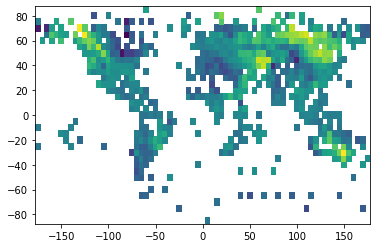

In [35]:
t_anom = ds.variables["temperature_anomaly"][-1, :, :]

plt.pcolormesh(
    ds.variables['longitude'][:],
    ds.variables['latitude'][:],
    t_anom
);
print(t_anom)

We can see that missing values are masked automatically. Sometimes the data in the binary format is scaled and has an offset to increase the precision of the numerical representation. These transformations are also applied automatically when reading the data into memory.

### Writing of NetCDF data sets

NetCDF Data sets are easily read but writing them is a little bit more cumbersome.
The following steps are necessary to create a complete NetCDF data set:

1.   Create a data set object and set the global attributes:

     ```python
     ds = nc.Dataset('test.nc', mode='w')
     ds.contact = 'Martin Claus <mclaus@geomar.de>'
     ds.description = 'Zonally averaged surface temperature from NCEP Reanalysis'
     ds.data_source = 'https://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'
     ds.creation_date = '16-06-2019'
     ```
     ```{warning}
     If the mode parameter of `nc.Dataset` is set to `w` a new file is created. An existing file with the same name will be deleted.
     Other modes are `a`, `r+` and `r`. See the [documentation](https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.Dataset.__init__)
     ```

2.   Create the dimensions:

     ```python
     ds.createDimension('latitude', 20)
     ds.createDimension('time', None)   # unlimited dimension
     ```

3.   Create the variables:

     ````{margin}
     ```{note}
     The `'f8'` specifies the datatype. See more options in the [documentation](https://unidata.github.io/netcdf4-python/netCDF4/index.html#netCDF4.Dataset.createVariable).
     ```
     ````
     ```python
     lon = ds.createVariable('latitude', 'f8', dimensions=('latitude',))
     time = ds.createVariable('time', 'f8', dimensions=('time',))
     t = ds.createVariable('temperature', 'f8', dimensions=('time', 'longitude')
     ```

4.   Write variable data and set their attributes

     ```python
     lon[:] = np.linspace(-80., 80., 20.)
     lon.units = "degrees_north"
     lon.long_name = "Latitude"

     time.units = 'days since 2012-01-01 00:00'
     time.calendar = 'gregorian'
     time.long_name = 'Time'

     t.units = 'degC'
     t.long_name = 'zonally averaged temperature'

     # write timestamp and data
     time[0] = 0.
     t[0, :] = ...
     ```

5.   Close the data set

     Only now the data will be written to disk.

     ```python
     ds.close()
     ```

## Other formats
Here is an incomplete list of links to libraries used to deal with other commonly used data formats. 

Format   |     Library
---------|---------------
JSON     |   [json](https://docs.python.org/3/library/json.html)
XML      |   [xml.etree.ElementTree](https://docs.python.org/3/library/xml.etree.elementtree.html)
Excel sheets      |   Transform to csv or [pandas](https://pandas.pydata.org/)
matlab `.mat` files      |   [scipy.io.loadmat](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy.io.loadmat)
shape files      |   [pyshp](https://pypi.org/project/pyshp/)